## GBM Practice

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
ds=pd.read_csv('data_Gradient_Boost.csv')
ds['spam'] = ds['yesno'].map({'y': 1, 'n': 0})
ds = ds.drop(['Unnamed: 0','yesno',], axis=1)
ds.head()


,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [3]:
ds.mean()

ds.groupby(['spam']).mean()

,crl.tot,dollar,bang,money,n000,make
spam,,,,,,
0,161.470947,0.011648,0.109984,0.017138,0.007088,0.073479
1,470.619415,0.174478,0.513713,0.212879,0.247055,0.152339


In [4]:
correlations = ds.corr()

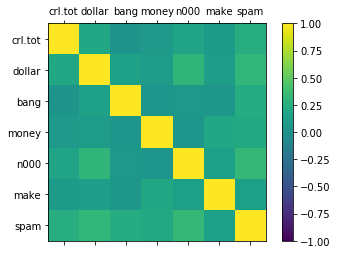

,crl.tot,dollar,bang,money,n000,make,spam
crl.tot,1.000000,0.201948,0.036321,0.080993,0.165977,0.089165,0.249164
dollar,0.201948,1.000000,0.142913,0.104691,0.310971,0.117419,0.323629
bang,0.036321,0.142913,1.000000,0.051076,0.070103,0.058292,0.241888
money,0.080993,0.104691,0.051076,1.000000,0.052587,0.188155,0.216111
n000,0.165977,0.310971,0.070103,0.052587,1.000000,0.134072,0.334787
make,0.089165,0.117419,0.058292,0.188155,0.134072,1.000000,0.126208
spam,0.249164,0.323629,0.241888,0.216111,0.334787,0.126208,1.000000


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(ds)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

In [6]:
y =ds.spam
df= ds.loc[:, ds.columns != 'spam']

In [7]:
#add features by generating interaction terms
dollar_bang=df['dollar']*df['bang']
dollar_money=df['dollar']*df['money']
dollar_n000=df['dollar']*df['n000']
dollar_make=df['dollar']*df['make']
dollar_crl=df['dollar']*df['crl.tot']

bang_money=df['bang']*df['money']
bang_n000=df['bang']*df['n000']
bang_make=df['bang']*df['make']
bang_crl=df['bang']*df['crl.tot']

money_n000=df['money']*df['n000']
money_make=df['money']*df['make']
money_crl=df['money']*df['crl.tot']

n000_make=df['n000']*df['make']
n000_crl=df['n000']*df['crl.tot']

make_crl=df['make']*df['crl.tot']

In [8]:
df=df.assign(dollar_bank=dollar_bang,dollar_money=dollar_money,dollar_n000=dollar_n000,dollar_make=dollar_make,dollar_crl=dollar_crl,bang_money=bang_money, bang_n000=bang_n000,bang_make=bang_make,bang_crl=bang_crl,money_n000=money_n000,money_make=money_make,money_crl=money_crl,n000_make=n000_make,n000_crl=n000_crl,make_crl=make_crl)

df.head()

,crl.tot,dollar,bang,money,n000,make,dollar_bank,dollar_money,dollar_n000,dollar_make,...,bang_money,bang_n000,bang_make,bang_crl,money_n000,money_make,money_crl,n000_make,n000_crl,make_crl
0,278,0.000,0.778,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,216.284,0.0000,0.0000,0.00,0.0000,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21,0.066960,0.07740,0.07740,0.03780,...,0.15996,0.15996,0.07812,382.416,0.1849,0.0903,442.04,0.0903,442.04,215.88
2,2259,0.184,0.276,0.06,1.16,0.06,0.050784,0.01104,0.21344,0.01104,...,0.01656,0.32016,0.01656,623.484,0.0696,0.0036,135.54,0.0696,2620.44,135.54
3,191,0.000,0.137,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,26.167,0.0000,0.0000,0.00,0.0000,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,25.785,0.0000,0.0000,0.00,0.0000,0.00,0.00


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from searchgrid import set_grid, make_grid_search

ModuleNotFoundError: No module named 'searchgrid'

In [ ]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.858
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       541
           1       0.91      0.73      0.81       380

   micro avg       0.86      0.86      0.86       921
   macro avg       0.87      0.84      0.85       921
weighted avg       0.86      0.86      0.85       921



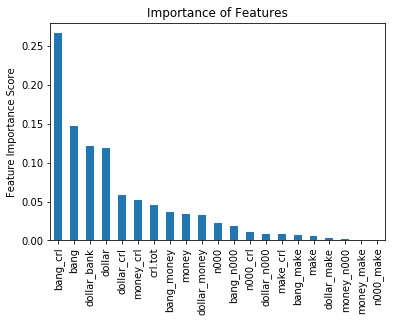

In [11]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.856
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       541
           1       0.91      0.72      0.81       380

   micro avg       0.86      0.86      0.86       921
   macro avg       0.87      0.84      0.85       921
weighted avg       0.86      0.86      0.85       921



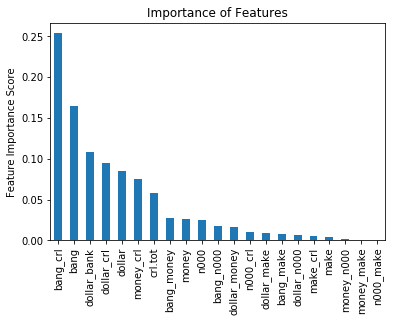

In [12]:
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

In [13]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


In [14]:
#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [15]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [16]:
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=40,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.95, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [17]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

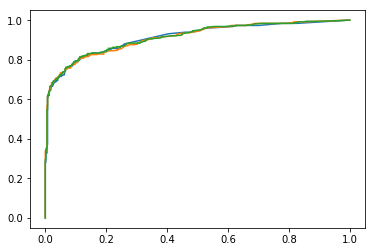

In [18]:
plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

No handles with labels found to put in legend.


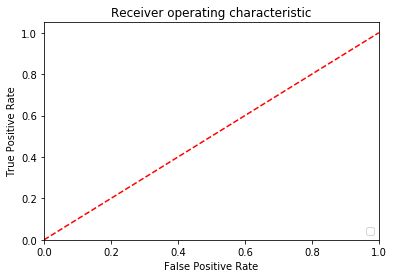

In [19]:
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()